In [69]:
# import libraries :
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, plot_roc_curve

In [70]:
# load the dataset :
train_data=pd.read_csv("C:/Users/ASUS/Desktop/DecisionTree/winequality-red.csv")

In [71]:
train_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


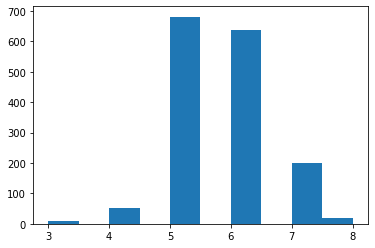

In [72]:
# plot the target column  :
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.hist(train_data['quality'],bins=10)
plt.show()

# Preprocessing 

In [73]:
#remove duplicates
train_data.drop_duplicates(inplace=True)

In [74]:
#finding null values :
train_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [75]:
#Finding Co-relation between data features attributes :
Corr=train_data.corr()
Corr_res=[]
for i in range(0,len(train_data.dtypes)):
    for j in range(0,len(train_data.dtypes)):
        value=Corr.iloc[i:i+1,j:j+1].values
        if value>0.8 and value!=1 :
            Corr_res.append(Corr.columns[i])

In [76]:
#standaradization :
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
train_data.iloc[:,:-1]=std.fit_transform(train_data.iloc[:,:-1]) #Standardize data set except dependent value(Quality feature)

# Splitting the dataset:

In [77]:
#Assigning dataframe to list of array values
X=train_data.iloc[:,:-1].values
Y=train_data.iloc[:,-1].values

In [78]:
#Split the data set in the ratio of 80:20 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

#  K - Nearest Neighbor:

Text(0, 0.5, 'Error Rate')

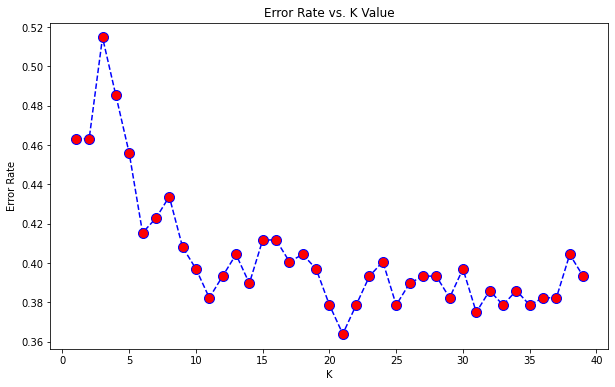

In [79]:
#finding the best k :
error_rate = []
for i in range(1, 40):
 
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), error_rate, color ='blue',
              linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [80]:
#K=21 has lowest error rate
#Model Fit
classifier2 = KNeighborsClassifier(n_neighbors= 21, metric = 'manhattan', p = 2,weights='uniform')
classifier2.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=21)

In [58]:
#Predicting the ouput from input data (x_train) and (y_train) 
y_pred1 = classifier2.predict(x_train)
y_pred2 = classifier2.predict(x_test)

# Accuracy :

In [59]:
from sklearn.metrics import accuracy_score
print("Accuracy score of train data set:",accuracy_score(y_train, y_pred1))
print("Accuracy score of test data set:",accuracy_score(y_test, y_pred2))

Accuracy score of train data set: 0.6264949402023919
Accuracy score of test data set: 0.6139705882352942


In [64]:
#If quality value is less than or eqaul to 6 then it will be in class 0
#If quality value is greater than 6  then it will be in class 1
train_data['quality'] = np.where(train_data['quality'] > 6, 1, 0)
train_data['quality'].value_counts()

0    1175
1     184
Name: quality, dtype: int64

In [65]:
#Assigning dataframe to list of array values
X = train_data.drop(['quality'], axis = 1).values
y = train_data['quality'].values

In [66]:
#Splitting the data in the proportion of 70:30 and 86:14
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   stratify = y,
                                                   test_size = 0.3,
                                                   random_state = 1111)

In [67]:
k = range(1,50,2)
testing_accuracy = []
training_accuracy = []
score = 0
#Fitting the model
for i in k:
    knn = KNeighborsClassifier(n_neighbors = i)
    pipe_knn = Pipeline([('scale', MinMaxScaler()), ('knn', knn)])
    pipe_knn.fit(X_train, y_train)
    
    y_pred_train = pipe_knn.predict(X_train)
    training_accuracy.append(accuracy_score(y_train, y_pred_train))
    
    y_pred_test = pipe_knn.predict(X_test)
    acc_score = accuracy_score(y_test,y_pred_test)
    testing_accuracy.append(acc_score)
    
    if score < acc_score:
        score = acc_score
        best_k = i
        
print('Best Accuracy Score', score, 'Best K-Score', best_k)

Best Accuracy Score 0.8872549019607843 Best K-Score 41
